2015 CAASPP test results.


* [Source Website](http://caaspp.cde.ca.gov/sb2015/ResearchFileList)
* [Data Dictionary](http://caaspp.cde.ca.gov/sb2015/research_fixfileformat)



In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import pandas as pd
df = pd.read_csv('ca2015_all_csv_v1.txt', na_values='*'  )
df['School Code'].value_counts()
schools = df[df['School Code'] != 0]
mss = schools[['Subgroup ID','Grade','Test Id','Mean Scale Score']]

# Scores By Race and Ethnicity, By School

These initial analyses compare the Mean Scale Scores for each race/ethnicity subgroup, for each school in the state. The scores are for Grade 11, reading test. 


In [98]:
mss = schools[['School Code','Subgroup ID','Grade','Test Id','Mean Scale Score']]
mss = mss[(mss['Grade'] == 11) & (mss['Test Id'] == 1)]
mss = mss[['School Code','Subgroup ID','Mean Scale Score']]
mssp = pd.pivot_table(mss,index='School Code', columns='Subgroup ID', values='Mean Scale Score')

## Summary Statistics For Race/Ethnicity

For each Race/Eth name, the suffix 'ED' means 'Economically Disadvantaged' -- usually assessed by paricipation in the free lunch program -- and 'P' means 'Not Economically Disadvantaged' ( Priviledged )

In [105]:
from pandas.tools.plotting import scatter_matrix

race_eth = mssp[[200,202,203,204,206]+[220, 222, 223, 224, 226]]
race_eth.columns = ['BlackED', 'AsianED', 'FilipinoED' , 'LatinoED', 'WhiteED', 
                    'BlackP', 'AsianP', 'FilipinoP' , 'LatinoP', 'WhiteP']
#scatter_matrix(race_eth, figsize=(15,15))
re_summary = race_eth.describe().T
re_summary

,count,mean,std,min,25%,50%,75%,max
BlackED,396,2527.781566,47.518842,2388.3,2498.375,2531.05,2561.825,2647.6
AsianED,311,2619.128939,47.606461,2421.6,2590.200,2621.00,2650.350,2750.8
FilipinoED,118,2609.539831,36.046385,2492.4,2586.225,2614.65,2631.925,2682.9
LatinoED,1524,2546.225525,56.372172,2308.4,2508.625,2557.70,2583.800,2729.1
WhiteED,726,2581.028788,45.125991,2432.9,2556.200,2585.40,2611.950,2695.7
BlackP,250,2580.009200,50.079676,2410.9,2550.725,2586.60,2616.550,2689.9
AsianP,376,2674.780851,37.636231,2488.2,2656.175,2678.75,2700.425,2766.2
FilipinoP,306,2650.473856,32.757949,2511.0,2630.975,2651.50,2672.950,2750.9
LatinoP,1081,2581.316189,56.423036,2376.5,2552.600,2591.50,2619.400,2735.3
WhiteP,964,2626.272407,49.004562,2414.8,2604.400,2632.40,2658.825,2744.0


Note that the Black mean is about 1 standard deviation ( ``std`` column ) below the White mean, while the Latino mean is about .6 std below and the Asian mean is about .6 std above. These are very common differences, which appear on almost any cognitive test, so it's a good check on the validity of the test. 

Additionally, note that the difference in economic status is also about 1 std. 

In [106]:
print re_summary.loc['BlackED']['mean'] -re_summary.loc['WhiteED']['mean']
print re_summary.loc['LatinoED']['mean'] -re_summary.loc['WhiteED']['mean']
print re_summary.loc['AsianED']['mean'] -re_summary.loc['WhiteED']['mean']
print re_summary.loc['WhiteP']['mean'] -re_summary.loc['WhiteED']['mean']

-53.2472222222
-34.8032629444
38.100151028
45.2436187602


# Histograms of Mean Scale Score

Histograms showing the spread of scores, first for Disadvantaged Whites vs Asians. This chart shows that the Asians aren't crowding the top of the scale, which would reduce the utility of the scores. 


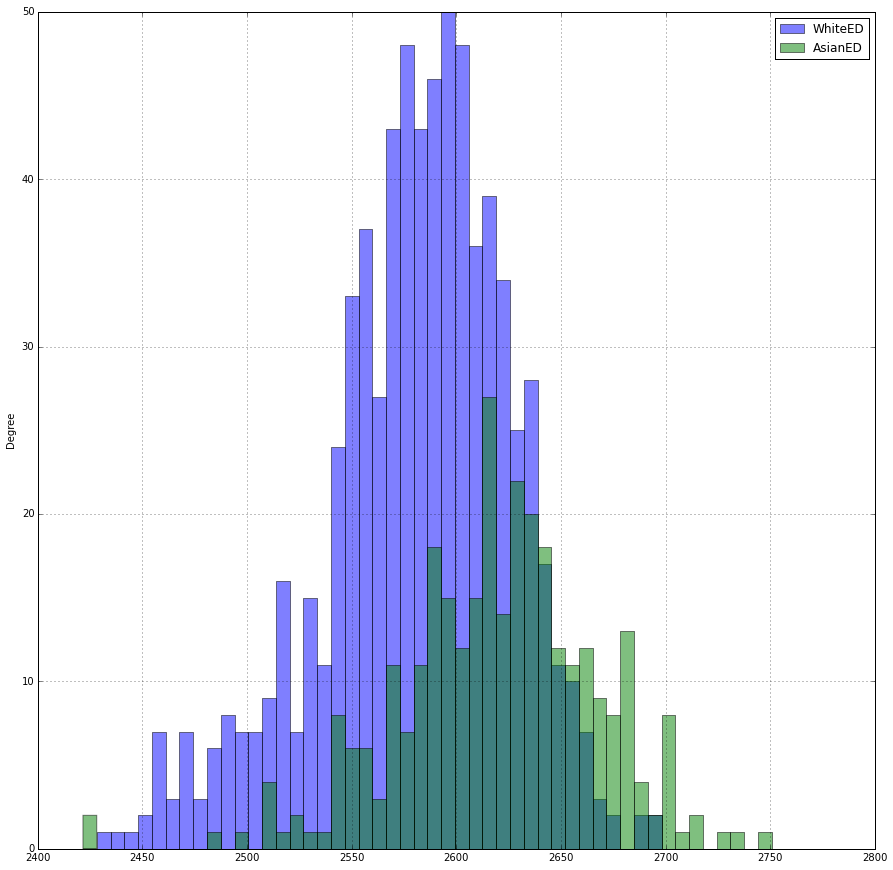

In [107]:
race_eth[['WhiteED','AsianED']].plot(kind='hist', alpha=0.5, bins=50, figsize=(15,15))

Note the odd shape, with a long flat tail to the right. 

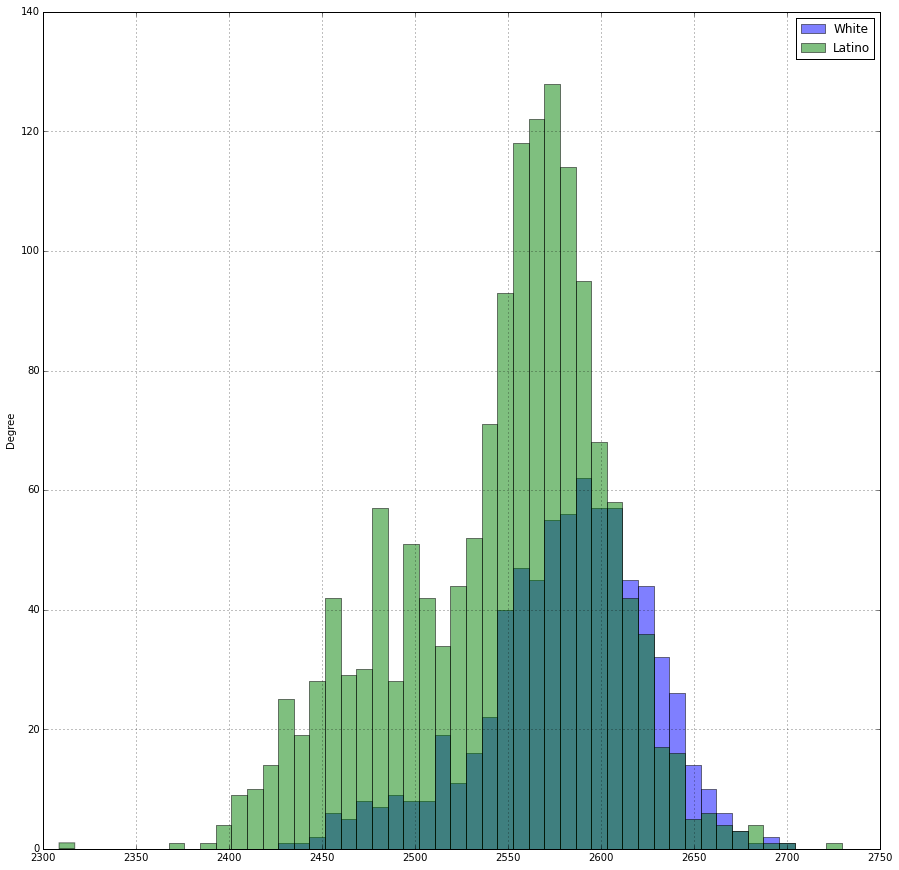

In [96]:
race_eth[['WhiteED','LatinoED']].plot(kind='hist', alpha=0.5, bins=50, figsize=(15,15))

Whites, Disadvantaged vs Priviledged.

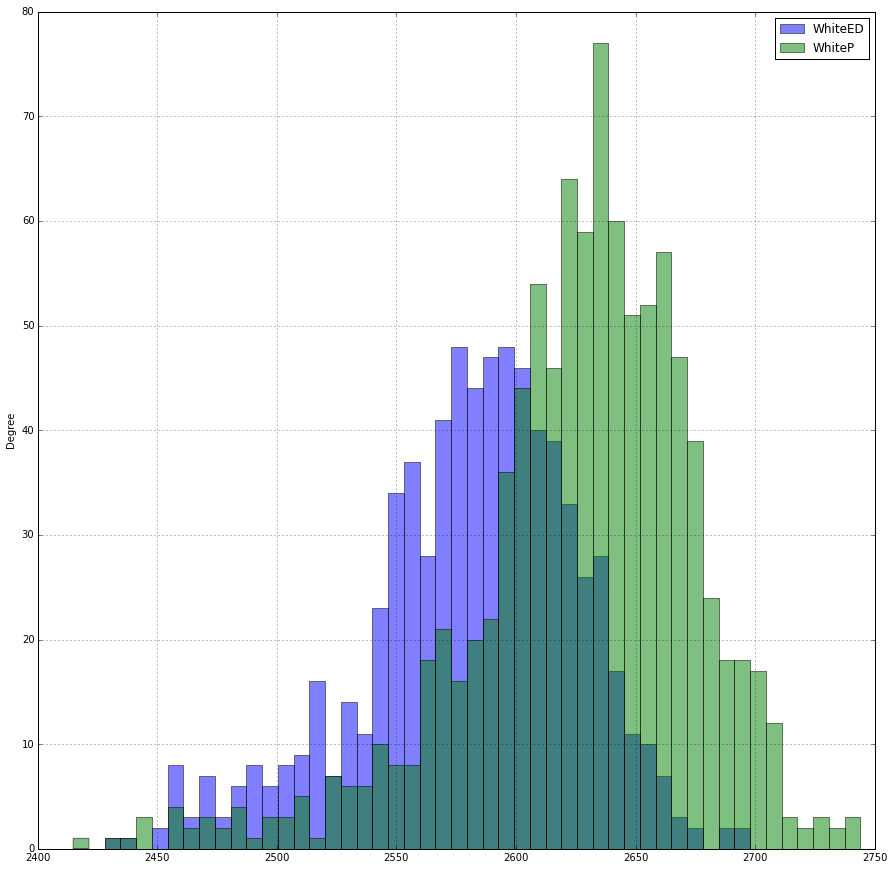

In [109]:
race_eth[['WhiteED','WhiteP']].plot(kind='hist', alpha=0.5, bins=50, figsize=(15,15))

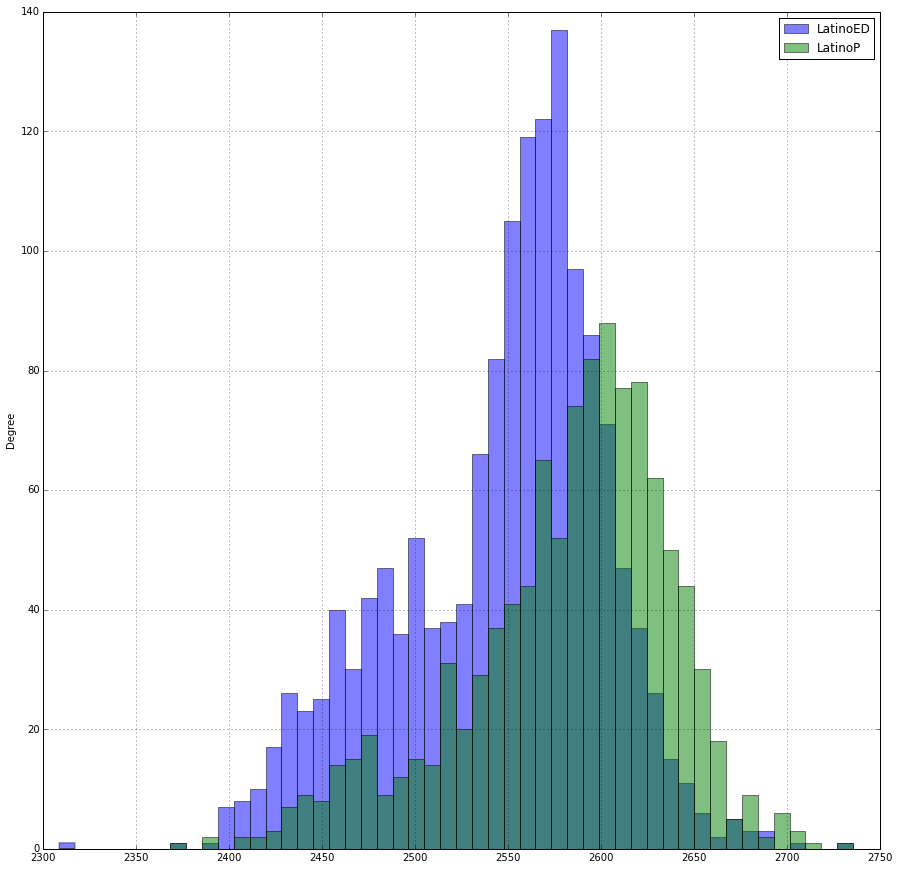

In [110]:
race_eth[['LatinoED','LatinoP']].plot(kind='hist', alpha=0.5, bins=50, figsize=(15,15))

Here are the two groups that are farthest apart, Disadvantaged Blacks and Priviledged Asians

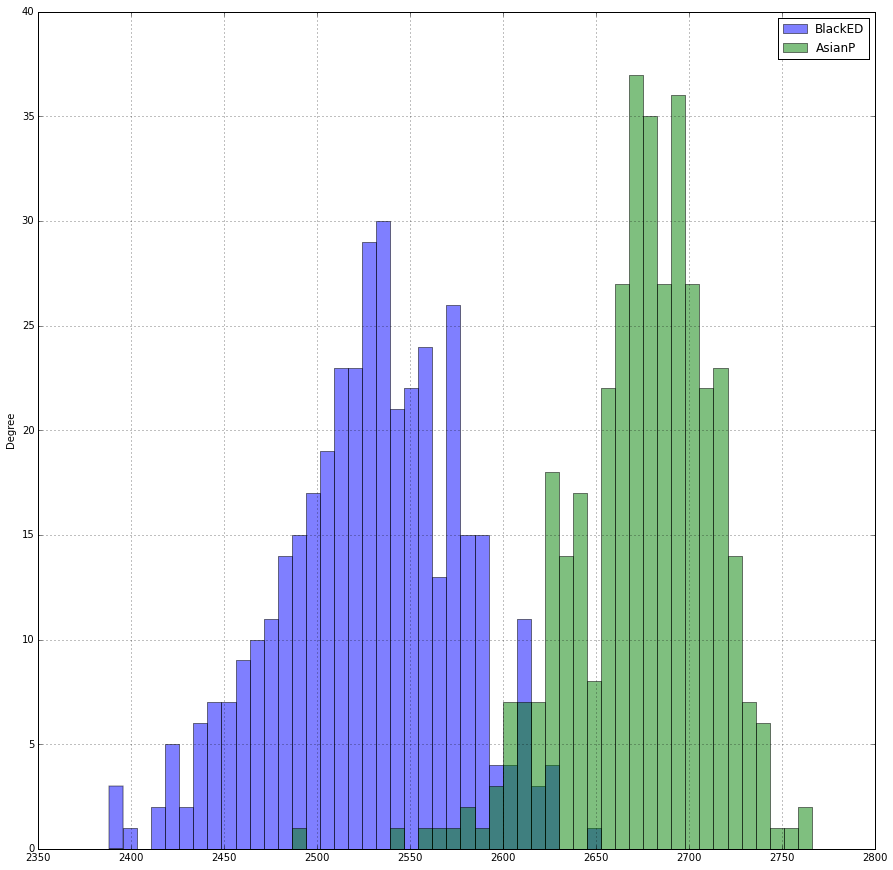

In [111]:
race_eth[['BlackED','AsianP']].plot(kind='hist', alpha=0.5, bins=50, figsize=(15,15))